In [3]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.append ('../../')
from fastai.conv_learner import *

from pathlib import Path
from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects

In [5]:
IMAGE_PATH = Path('../data/images')
list(IMAGE_PATH.iterdir())

[PosixPath('../data/images/1-1.png'),
 PosixPath('../data/images/14528438803835.png'),
 PosixPath('../data/images/14528439018106.png'),
 PosixPath('../data/images/1457419537031DSC_0002.png'),
 PosixPath('../data/images/14581478679181.png'),
 PosixPath('../data/images/14581478724391A.png'),
 PosixPath('../data/images/14581478747652.png'),
 PosixPath('../data/images/14581478758592A.png'),
 PosixPath('../data/images/14581479921661.png'),
 PosixPath('../data/images/14581479989671A.png'),
 PosixPath('../data/images/14581480015911.png'),
 PosixPath('../data/images/14581480028821A.png'),
 PosixPath('../data/images/14581480050692.png'),
 PosixPath('../data/images/14581480081802A.png'),
 PosixPath('../data/images/14581480110553.png'),
 PosixPath('../data/images/147753724434220161026_121130.png'),
 PosixPath('../data/images/147753727917820161026_121147.png'),
 PosixPath('../data/images/147753733706520161026_122059.png'),
 PosixPath('../data/images/147753738374720161026_122118.png'),
 PosixPath('

In [6]:
trn_j = pd.read_csv('training.csv')

In [7]:
trn_j.keys()

Index(['image_name', 'x1', 'x2', 'y1', 'y2'], dtype='object')

In [8]:
trn_j[:10]

,image_name,x1,x2,y1,y2
0,JPEG_20160706_121146_1000145715002.png,115,495,143,325
1,JPEG_20161119_174038_1000690577600.png,23,457,61,409
2,147444927651111470309333776-Roadster-Men-Casua...,37,601,13,470
3,147772332675720161028_161611.png,27,602,162,385
4,1473315333651DeeplearnS11638.png,60,586,174,325
5,JPEG_20161129_143914_1000304878557.png,35,549,37,442
6,JPEG_20161028_100621_1000815239330.png,77,558,86,434
7,1475060075141DSC02381.png,50,627,95,320
8,1473317734429DeeplearnS142.png,104,552,83,428
9,JPEG_20160607_153530_1000669241198.png,134,500,67,429


In [9]:
image_name, x1, x2, y1, y2 = 'image_name', 'x1', 'x2', 'y1', 'y2'

In [10]:
trn_j[image_name][:5]

0               JPEG_20160706_121146_1000145715002.png
1               JPEG_20161119_174038_1000690577600.png
2    147444927651111470309333776-Roadster-Men-Casua...
3                     147772332675720161028_161611.png
4                     1473315333651DeeplearnS11638.png
Name: image_name, dtype: object

In [11]:
img_col = trn_j[image_name]

In [12]:
img_col.shape


(14000,)

In [13]:
img_col[0]

'JPEG_20160706_121146_1000145715002.png'

In [14]:
bb = np.array([trn_j[y1], trn_j[x1], trn_j[y2], trn_j[x2]]).T

In [15]:
bb[:5]

array([[143, 115, 325, 495],
       [ 61,  23, 409, 457],
       [ 13,  37, 470, 601],
       [162,  27, 385, 602],
       [174,  60, 325, 586]])

In [16]:
width = trn_j[x2] - trn_j[x1] + 1
height = trn_j[y2] - trn_j[y1] + 1

In [17]:
bounding_box = np.column_stack((np.array(trn_j[x1]), np.array(trn_j[y1]), np.array(width), np.array(height)))

In [18]:
#np.array([width, height, trn_j[x1], trn_j[y1]])

In [19]:
trn_j[x1]

0        115
1         23
2         37
3         27
4         60
5         35
6         77
7         50
8        104
9        134
10        99
11        59
12        52
13       179
14        77
15        85
16        22
17       125
18       154
19       134
20       161
21       114
22        42
23       226
24        28
25        24
26        65
27       209
28       175
29         0
        ... 
13970    138
13971     34
13972    126
13973    146
13974     43
13975    219
13976     37
13977     54
13978    135
13979      3
13980     78
13981      2
13982    235
13983     91
13984     64
13985     96
13986     39
13987    133
13988    133
13989    241
13990    115
13991    100
13992    157
13993     97
13994     45
13995     71
13996     72
13997      0
13998    254
13999    212
Name: x1, Length: 14000, dtype: int64

In [337]:
bounding_box[0]

array([115, 143, 381, 183])

In [338]:
im = open_image(IMAGE_PATH/img_col[0])
print(im.shape)

(480, 640, 3)


In [339]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig, ax = plt.subplots(figsize = figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)
    return ax

In [340]:
def draw_rect(ax, b):
    patch = ax.add_patch(patches.Rectangle((b[0], b[1]), b[2], b[3], fill=False, edgecolor='black', lw=2))


In [341]:
bounding_box[0]

array([115, 143, 381, 183])

In [342]:
def bb_hw(a): return np.array([a[1],a[0],a[3]-a[1]+1,a[2]-a[0]+1])

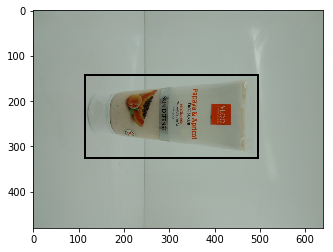

In [343]:
ax = show_img(im)
draw_rect(ax, bounding_box[0])


In [29]:
def draw_idx(i):
    im = open_image(IMAGE_PATH/img_col[i])
    ax = show_img(im, figsize=(16, 8))
    draw_rect(ax, bounding_box[i])
    print(im.shape)


(480, 640, 3)


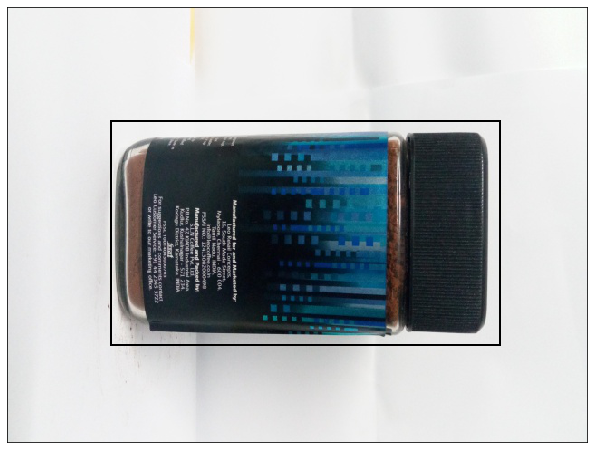

In [30]:
draw_idx(21)

In [319]:
f_model = resnet34
sz=224
bs=64

In [32]:
PATH = Path()
list(PATH.iterdir())

[PosixPath('.ipynb_checkpoints'),
 PosixPath('.~lock.submission.csv#'),
 PosixPath('bb.csv'),
 PosixPath('bin'),
 PosixPath('final.csv'),
 PosixPath('include'),
 PosixPath('lib'),
 PosixPath('models'),
 PosixPath('object_detection-Copy1.ipynb'),
 PosixPath('object_detection.ipynb'),
 PosixPath('submission.csv'),
 PosixPath('test'),
 PosixPath('test.csv'),
 PosixPath('tmp'),
 PosixPath('training.csv'),
 PosixPath('tt.csv'),
 PosixPath('Untitled.ipynb')]

In [33]:
bbs = [' '.join(str(p) for p in o) for o in bb]
df = pd.DataFrame({'fn': trn_j[image_name], 'bbox': bbs}, columns=['fn','bbox'])

In [31]:
df[:5]

,fn,bbox
0,JPEG_20160706_121146_1000145715002.png,143 115 325 495
1,JPEG_20161119_174038_1000690577600.png,61 23 409 457
2,147444927651111470309333776-Roadster-Men-Casua...,13 37 470 601
3,147772332675720161028_161611.png,162 27 385 602
4,1473315333651DeeplearnS11638.png,174 60 325 586


In [34]:
BB_CSV = PATH/'bb.csv'

In [35]:
df.to_csv(BB_CSV, index = False)

In [36]:
BB_CSV.open().readlines()[:5]

['fn,bbox\n',
 'JPEG_20160706_121146_1000145715002.png,143 115 325 495\n',
 'JPEG_20161119_174038_1000690577600.png,61 23 409 457\n',
 '147444927651111470309333776-Roadster-Men-Casual-Shoes-3041470309333487-1.png,13 37 470 601\n',
 '147772332675720161028_161611.png,162 27 385 602\n']

(480, 640, 3)


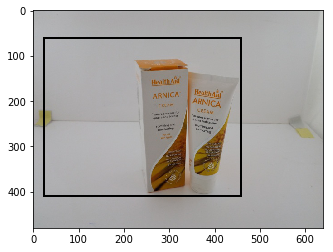

In [314]:
ax = show_img(im)
draw_rect(ax, bb_hw(bb[1]))
print(im.shape)


In [332]:
augs = [RandomFlip(tfm_y=TfmType.COORD),
        RandomRotate(30, tfm_y=TfmType.COORD),
        RandomLighting(0.1,0.1, tfm_y=TfmType.COORD)]

Hey


In [333]:
tfms = tfms_from_model(f_model, sz, crop_type = CropType.NO, tfm_y=TfmType.COORD, aug_tfms=augs )
md = ImageClassifierData.from_csv(PATH, IMAGE_PATH, BB_CSV, tfms = tfms, continuous = True, bs = 4)

[ 46.  69. 146.  97.]
[ 29.  46. 156. 151.]
[ 48.  76. 142.  84.]
[ 43.  35. 155. 157.]
[ 27.  50. 153. 130.]
[ 47.  74. 144.  88.]
[ 48.  76. 142.  84.]
[ 34.  76. 142.  84.]
[ 29.  46. 156. 152.]


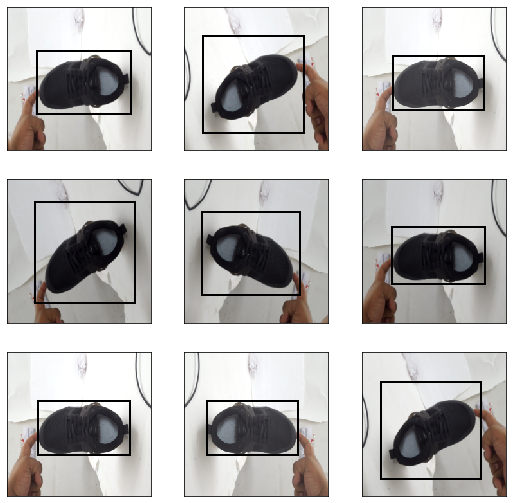

In [40]:
idx=3
fig,axes = plt.subplots(3,3, figsize=(9,9))
for i,ax in enumerate(axes.flat):
    x,y=next(iter(md.aug_dl))
    ima=md.val_ds.denorm(to_np(x))[idx]
    b = bb_hw(to_np(y[idx]))
    print(b)
    show_img(ima, ax=ax)
    draw_rect(ax, b)

In [41]:
??tfms

(480, 640, 3)


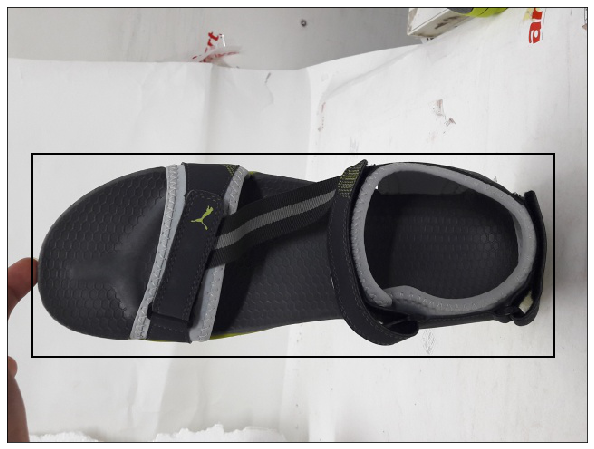

In [38]:
draw_idx(3)


([<fastai.transforms.Scale object at 0x7f73526ec0f0>, <fastai.transforms.NoCrop object at 0x7f73526ec5f8>, <fastai.transforms.Normalize object at 0x7f73526ecef0>, <fastai.transforms.ChannelOrder object at 0x7f73526eca58>],
 [<fastai.transforms.Scale object at 0x7f73526ec400>, <fastai.transforms.NoCrop object at 0x7f73526ece80>, <fastai.transforms.Normalize object at 0x7f73526ecef0>, <fastai.transforms.ChannelOrder object at 0x7f73526ec518>])

In [39]:
def bb_intersection_over_union(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    # compute the area of intersection rectangle
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)

    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)

    # return the intersection over union value
    return iou

In [43]:

head_reg4 = nn.Sequential(Flatten(), nn.Linear(25088,4))


## setting pretrained to false to not use transfer learning

In [44]:
learn = ConvLearner.pretrained(f_model, md, precompute=False, pretrained=False,custom_head=head_reg4)

In [45]:
learn.opt_fn = optim.Adam
learn.crit = nn.L1Loss()


In [239]:
learn.lr_find(1e-5, 100)

 35%|███▌      | 982/2800 [05:58<11:33,  2.62it/s, loss=154] 

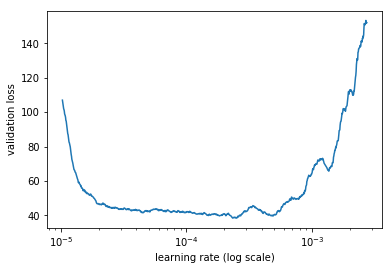

In [240]:
learn.sched.plot(5)

In [45]:
??learn.fit_opt_sched

In [243]:
lr = 2e-5

In [426]:
#run this 5 times
learn.fit(lr, 3, cycle_len = 1, cycle_mult = 2 )


epoch      trn_loss   val_loss                                 
    0      13.468869  12.52639  
    1      10.920483  9.830469                                 
  0%|          | 4/2800 [00:06<1:22:30,  1.77s/it, loss=10.6]

KeyboardInterrupt: 

In [ ]:
#learn.save('first')

In [427]:
lrs = np.array([lr/100, lr/10, lr])

In [428]:
#to further fine tune the model
learn.freeze_to(-2)

 93%|█████████▎| 2595/2800 [38:00<02:45,  1.24it/s, loss=37.2] 

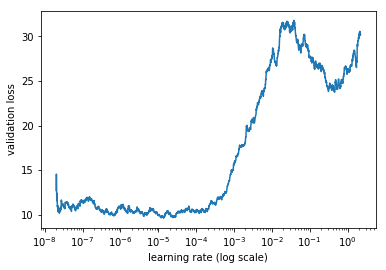

In [429]:
lrf = learn.lr_find(lrs/1000)
learn.sched.plot(1)

In [431]:
learn.fit(lrs, 2, cycle_len=1, cycle_mult=2)

 22%|██▏       | 624/2800 [09:23<31:55,  1.14it/s, loss=10.2]  

KeyboardInterrupt: 

In [432]:
learn.save('last')

In [147]:
print(preds)

[[ 88.83549 128.61934 433.3285  518.27155]
 [ 75.59447  73.77139 419.33545 511.27832]
 [151.5003   96.13582 333.03952 492.82425]
 [141.44     87.66187 375.0815  580.67346]]


In [82]:
x,y = next(iter(md.val_dl))
learn.model.eval()
preds = to_np(learn.model(VV(x)))

IndexError: index 4 is out of bounds for axis 0 with size 4

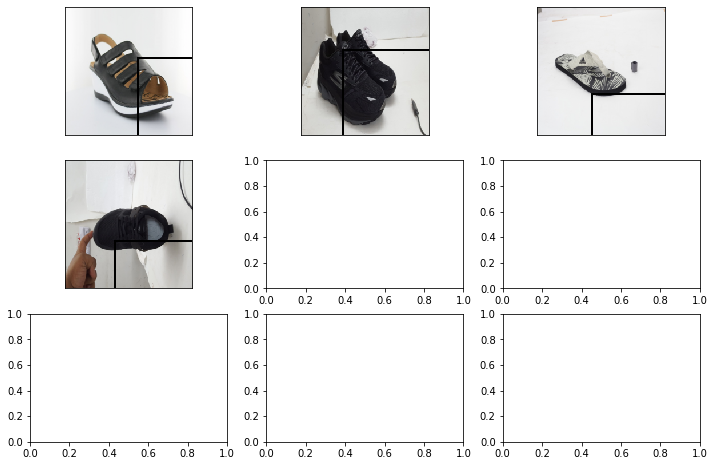

In [83]:
fig, axes = plt.subplots(3, 3, figsize=(12, 8))
for i,ax in enumerate(axes.flat):
    ima=md.val_ds.denorm(to_np(x))[i]
    b = bb_hw(preds[i])
    ax = show_img(ima, ax=ax)
    draw_rect(ax, b)
plt.tight_layout()

In [344]:
test_j = pd.read_csv('test.csv')

In [345]:
test_image = test_j['image_name']

In [346]:
test_image[:5],

(0                 1474723840903DSC08089.png
 1          1473231475010DeeplearnS11276.png
 2    JPEG_20161205_135307_1000155917326.png
 3    JPEG_20160711_123440_1000518778437.png
 4     JPEG_20160803_115329_100034020722.png
 Name: image_name, dtype: object,)

In [347]:
TEST_IMAGE_PATH = Path('../test')

In [348]:
for img_name in test_image:
    
        shutil.copy(IMAGE_PATH/img_name, TEST_IMAGE_PATH)

KeyboardInterrupt: 

True

In [100]:
test_image.to_csv('tt.csv', index=False)

In [101]:
TEST_CSV = PATH/'tt.csv'

In [102]:
TEST_CSV.open().readlines()[:5]

['1474723840903DSC08089.png\n',
 '1473231475010DeeplearnS11276.png\n',
 'JPEG_20161205_135307_1000155917326.png\n',
 'JPEG_20160711_123440_1000518778437.png\n',
 'JPEG_20160803_115329_100034020722.png\n']

In [204]:
data = ImageClassifierData.from_csv(PATH, IMAGE_PATH, csv_fname= 'test.csv', bs=bs, tfms=tfms, test_name='test', continuous=True)
air_learn = ConvLearner.pretrained(f_model, data, precompute=False,custom_head=head_reg4)


In [222]:
tfms

([<fastai.transforms.Scale object at 0x7f73526ec0f0>, <fastai.transforms.NoCrop object at 0x7f73526ec5f8>, <fastai.transforms.Normalize object at 0x7f73526ecef0>, <fastai.transforms.ChannelOrder object at 0x7f73526eca58>],
 [<fastai.transforms.Scale object at 0x7f73526ec400>, <fastai.transforms.NoCrop object at 0x7f73526ece80>, <fastai.transforms.Normalize object at 0x7f73526ecef0>, <fastai.transforms.ChannelOrder object at 0x7f73526ec518>])

In [207]:
air_learn.load('weights')

In [208]:
preds = to_np(air_learn.predict(is_test=True))

In [209]:
preds[:5]

array([[128.38226, 134.80156, 347.53433, 494.57272],
       [ 74.7038 , 157.33766, 390.9179 , 480.46368],
       [ 54.81977, 119.84664, 393.98978, 511.08176],
       [ 77.80317, 170.42043, 393.48813, 480.29788],
       [100.44083, 123.90859, 365.6041 , 495.68793]], dtype=float32)

In [218]:
x,y = next(iter(data.test_dl))
air_learn.model.eval()
pre = to_np(air_learn.model(VV(x)))

array([-1.09647, -0.84973,  0.67153,  1.27466], dtype=float32)

In [167]:
outp = [str(p).split(' ') for p in preds]

In [336]:
 #ima=data.test_ds.denorm(to_np(x))[i]
#ima[:5]

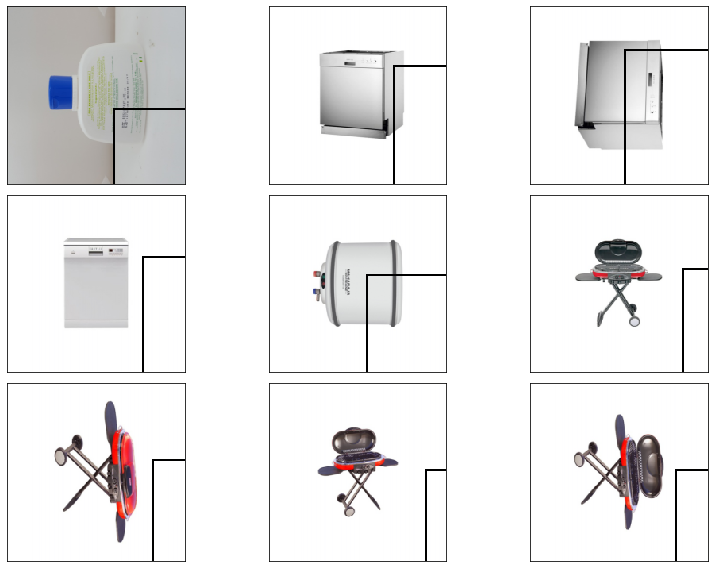

In [219]:
fig, axes = plt.subplots(3, 3, figsize=(12, 8))
for i,ax in enumerate(axes.flat):
    ima=data.test_ds.denorm(to_np(x))[i]
    b = bb_hw(pre[i])
    ax = show_img(ima, ax=ax)
    draw_rect(ax, b)
plt.tight_layout()

In [174]:
??learn.predict

# final calculations

In [177]:

tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO)
data1 = ImageClassifierData.from_csv(PATH, IMAGE_PATH, csv_fname= 'test.csv', tfms=tfms, bs=bs, test_name='test', continuous=True)

print( type(data1) )

first1 = ConvLearner.pretrained(f_model, data1, precompute=False,custom_head=head_reg4)


<class 'fastai.dataset.ImageClassifierData'>


In [47]:
first1.load('last')

In [48]:
preds = to_np(first1.predict(is_test=True))

In [49]:
preds[:5]

array([[ 57.75436,  37.04908, 169.72188, 171.1873 ],
       [ 29.81512,  53.0016 , 174.25246, 171.87022],
       [ 13.73647,  42.04683, 192.61624, 191.11612],
       [ 30.15597,  60.43573, 188.67262, 161.8236 ],
       [ 38.97511,  48.32681, 179.96326, 180.44174]], dtype=float32)

In [383]:
x,y = next(iter(data1.test_dl))
first1.model.eval()
pre = to_np(first1.model(VV(x)))


In [147]:
ima=data1.test_ds.denorm(to_np(x))[i]
#im

AxesSubplot(0.125,0.536818;0.352273x0.343182)
(64, 3, 224, 224)
(224, 224, 3)
[ 57.75436  37.04908 169.72188 171.1873 ]
[ 37.04908  57.75436 135.13821 112.96751]
AxesSubplot(0.547727,0.536818;0.352273x0.343182)
(64, 3, 224, 224)
(224, 224, 3)
[ 29.81512  53.0016  174.25246 171.87022]
[ 53.0016   29.81512 119.86862 145.43733]
AxesSubplot(0.125,0.125;0.352273x0.343182)
(64, 3, 224, 224)
(224, 224, 3)
[ 13.73647  42.04683 192.61624 191.11612]
[ 42.04683  13.73647 150.06929 179.87978]
AxesSubplot(0.547727,0.125;0.352273x0.343182)
(64, 3, 224, 224)
(224, 224, 3)
[ 30.15597  60.43573 188.67262 161.8236 ]
[ 60.43573  30.15597 102.38786 159.51665]


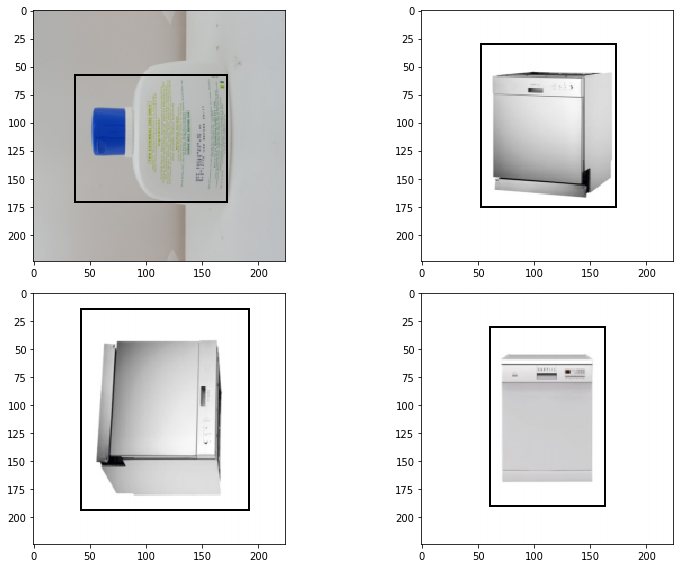

In [388]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i,ax in enumerate(axes.flat):
    
#     print(i)
    print(ax)
    
#   print( to_np(x).shape )
    
    ima=data1.test_ds.denorm(to_np(x))[i]
    
    print( to_np(x).shape )
    print( ima.shape )
    
    b = bb_hw(preds[i])
    
    print(preds[i])
    
    print(b)

    
    ax = show_img(ima, ax=ax)
    draw_rect(ax, b)
plt.tight_layout()


In [335]:
??tfms_from_model

In [61]:
df = pd.read_csv('test.csv')
test_image = df['image_name']
test_image.shape



(12815,)

In [493]:
pre_y1 = np.array(preds[:, 0])
pre_x1 = np.array(preds[:, 1])
pre_y2 = np.array(preds[:, 2])
pre_x2 = preds[:, 3]

pre_y1 = 240 + 2.142*(pre_y1 + 128 - 240)
pre_x1 = 320 + 2.857*(pre_x1 + 208 - 320)

pre_y2 = 240 + 2.142*(pre_y2 + 128 - 240)
pre_x2 = 320 + 2.857*(pre_x2 + 208 - 320)

df_pred = np.column_stack([test_image, pre_x1, pre_x2, pre_y1, pre_y2])


In [494]:
df_pred[:5]

array([['1474723840903DSC08089.png', 105.86518859863281, 489.0981750488281, 123.80584716796875,
        363.6402282714844],
       ['1473231475010DeeplearnS11276.png', 151.4415283203125, 491.0492858886719, 63.96000671386719,
        373.3447265625],
       ['JPEG_20161205_135307_1000155917326.png', 120.14378356933594, 546.0347900390625, 29.519515991210938,
        412.67999267578125],
       ['JPEG_20160711_123440_1000518778437.png', 172.68087768554688, 462.3460693359375, 64.69010925292969,
        404.23272705078125],
       ['JPEG_20160803_115329_100034020722.png', 138.085693359375, 515.5380859375, 83.58065795898438,
        385.5773010253906]], dtype=object)

In [495]:
df_pred1 = pd.DataFrame({'image_name': test_image, 'x1': pre_x1, 'x2': pre_x2, 'y1': pre_y1, 'y2': pre_y2})

[151.44153  63.96001 340.60776 310.3847 ]
['1474723840903DSC08089.png' 105.86518859863281 489.0981750488281 123.80584716796875 363.6402282714844]


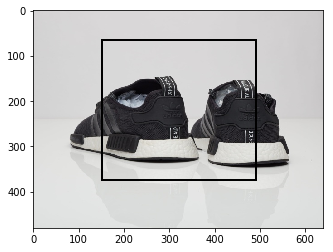

In [496]:
im = open_image(IMAGE_PATH/df_pred1['image_name'][1])
ax = show_img(im)

b = np.array([pre_x1[1], pre_y1[1], pre_x2[1] - pre_x1[1] + 1, pre_y2[1] - pre_y1[1] + 1 ])
print(b)
print(df_pred[0])
draw_rect(ax, b)



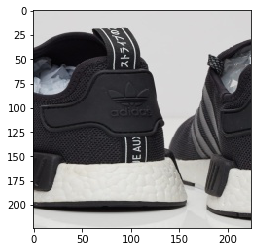

In [497]:
def crop(im, r, c, sz): 
    '''
    crop image into a square of size sz, 
    '''
    return im[r:r+sz, c:c+sz]

def center_crop(im, min_sz=None):
    """ Return a center crop of an image """
    r,c,*_ = im.shape
    if min_sz is None: min_sz = min(r,c)
    start_r = math.ceil((r-min_sz)/2)
    start_c = math.ceil((c-min_sz)/2)
    return crop(im, start_r, start_c, min_sz)

im1 = center_crop(im, 224)
ax1 = show_img(im1)

In [498]:
df_pred1.to_csv('finish.csv', index=False)

In [499]:
test_j = pd.read_csv('finish.csv')
test_j[:5]

,image_name,x1,x2,y1,y2
0,1474723840903DSC08089.png,105.86519,489.09818,123.805850,363.64023
1,1473231475010DeeplearnS11276.png,151.44153,491.04930,63.960007,373.34473
2,JPEG_20161205_135307_1000155917326.png,120.14378,546.03480,29.519516,412.68000
3,JPEG_20160711_123440_1000518778437.png,172.68088,462.34607,64.690110,404.23273
4,JPEG_20160803_115329_100034020722.png,138.08570,515.53810,83.580660,385.57730


In [417]:
test_j.keys()

Index(['image_name', 'x1', 'x2', 'y1', 'y2'], dtype='object')

In [418]:
width = test_j[x2] - test_j[x1] + 1
height = test_j[y2] - test_j[y1] + 1

In [419]:
bounding_box_test = np.column_stack((np.array(test_j[x1]), np.array(test_j[y1]), np.array(width), np.array(height)))

In [420]:
bounding_box_test[0]

array([161.50798, 115.50873, 296.10408, 224.93503])

In [421]:
test_j['image_name'][0]

'1474723840903DSC08089.png'

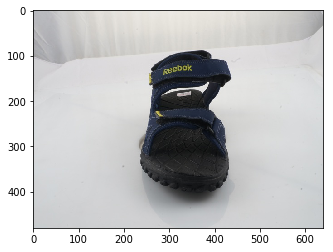

In [422]:
im = open_image(IMAGE_PATH/test_j['image_name'][0])
ax = show_img(im)


In [423]:
def hw_bb(bb): return np.array([bb[1], bb[0], bb[3]+bb[1]-1, bb[2]+bb[0]-1])


In [424]:
new_bounding_box = np.empty_like(bounding_box_test)

In [425]:
i = 0
for b in bounding_box_test:
    new_bounding_box[i] = hw_bb(b)
    i = i + 1
    '''
    new_bounding_box[i] = hw_bb(b)
    i = i + 1
    '''

In [426]:
new_bounding_box[:5]

array([[115.50873, 161.50798, 339.44376, 456.61206],
       [ 59.63024, 196.60353, 348.5049 , 458.1145 ],
       [ 27.47294, 172.50302, 385.23248, 500.45547],
       [ 60.31195, 212.95862, 377.34525, 436.0119 ],
       [ 77.95021, 186.319  , 359.9265 , 476.97183]])

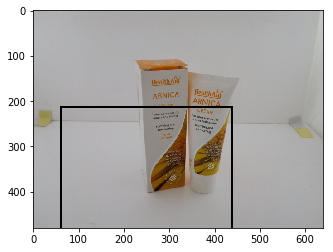

In [427]:
im = open_image(IMAGE_PATH/test_j['image_name'][3])
ax = show_img(im)

draw_rect(ax, new_bounding_box[3])


In [428]:
fin_y1 = new_bounding_box[:, 0]
fin_x1 = new_bounding_box[:, 1]
fin_x2 = new_bounding_box[:, 3] + fin_x1 - 1
fin_y2 = new_bounding_box[:, 2] + fin_y1 -1
fin_img = test_j['image_name']

stack = np.column_stack([fin_x1, fin_x2, fin_y1, fin_y2])

In [429]:
df = pd.DataFrame({'image_name': fin_img, 'x1': fin_x1, 'x2': fin_x2, 'y1': fin_y1, 'y2': fin_y2 })

In [430]:
df.to_csv('final.csv', index=False)

In [431]:
df[:5]

,image_name,x1,x2,y1,y2
0,1474723840903DSC08089.png,161.50798,617.12004,115.508730,453.952490
1,1473231475010DeeplearnS11276.png,196.60353,653.71803,59.630245,407.135145
2,JPEG_20161205_135307_1000155917326.png,172.50302,671.95849,27.472944,411.705424
3,JPEG_20160711_123440_1000518778437.png,212.95862,647.97052,60.311947,436.657197
4,JPEG_20160803_115329_100034020722.png,186.31900,662.29083,77.950210,436.876710


In [200]:
width = df[x2] - df[x1] + 1
height = df[y2] - df[y1] + 1
bc = np.column_stack([df[x1], df[y1], height, width])

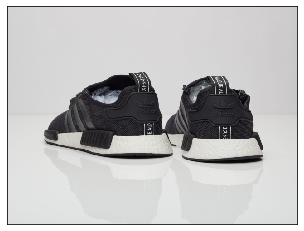

In [201]:
im = open_image(IMAGE_PATH/test_j['image_name'][1])
ax = show_img(im)
draw_rect(ax, bc[10])